In [1]:
#Python/Data
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as mcolors
import numpy as np
import h5py as h5
import pickle

import os
import shutil

from training_functions import *

#ML
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split
import tensorflow as tf

In [2]:
h5_filename = "../generate_data/to_hdf5/Uniform_pi+_0-100GeV_standalone_TVT_Split.hdf5"
h5_file = h5.File(h5_filename,'r')
#label = "2M_hcal"  #Replace with your own variation!
label = "Gen_Data_Fixed"
path = "./"+label

In [3]:
print(path)

./Gen_Data_Fixed


In [4]:
mypreds = np.load("%s/predictions.npy"%(path))
Y_test_dataset = h5_file["test_mc"]
Y_test = Y_test_dataset[:,8,0]

(array([ 2995., 15977., 12191., 13066., 12546., 12042., 14038., 14724.,
         1373.,    48.]),
 array([-1.9325907 , -1.5513629 , -1.1701349 , -0.78890705, -0.40767917,
        -0.02645129,  0.3547766 ,  0.7360045 ,  1.1172323 ,  1.4984603 ,
         1.8796881 ], dtype=float32),
 <BarContainer object of 10 artists>)

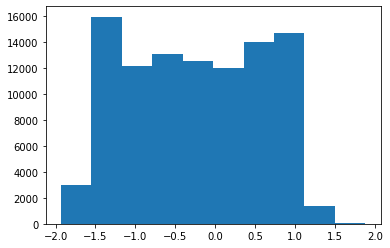

In [5]:
plt.hist(mypreds)

In [6]:
mypreds = (mypreds*target_stdevs[8])+target_means[8]

(array([ 2995., 15977., 12191., 13066., 12546., 12042., 14038., 14724.,
         1373.,    48.]),
 array([-1.9325907 , -1.5513629 , -1.1701349 , -0.78890705, -0.40767917,
        -0.02645129,  0.3547766 ,  0.7360045 ,  1.1172323 ,  1.4984603 ,
         1.8796881 ], dtype=float32),
 <BarContainer object of 10 artists>)

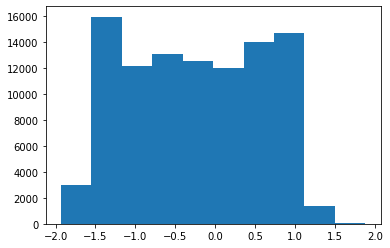

In [7]:
plt.hist(mypreds)

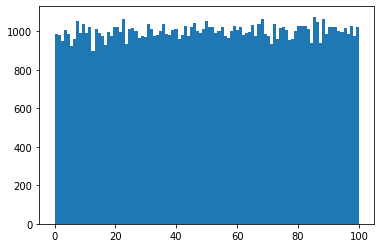

In [8]:
_ = plt.hist(Y_test,bins=np.linspace(0,100,100))

In [9]:
with open(path+'/history_file', 'rb') as hist_file:                                                                                               
    the_fit = pickle.load(hist_file)

In [10]:
batch_loss = np.load(path+'/batch_loss.npy')
batch_x = np.linspace(0,len(the_fit['loss']),len(batch_loss))

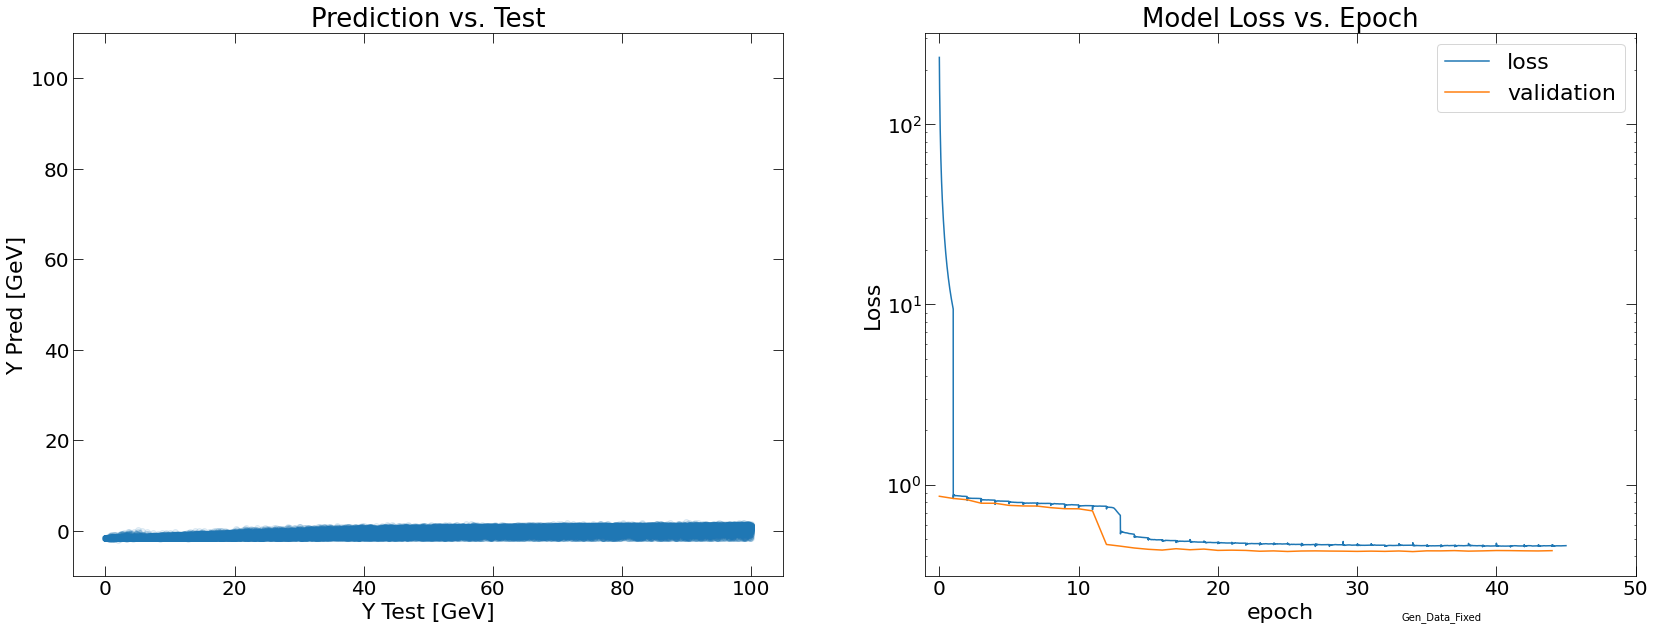

In [11]:
fig = plt.figure(figsize=(28,10))
ax = plt.subplot(1, 2, 1)
plt.scatter(Y_test,mypreds,alpha=0.1)
plt.xlabel("Y Test [GeV]",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
#plt.ylim(-0.01,100.01)
plt.ylim(-10,110)
plt.ylabel("Y Pred [GeV]",fontsize=22)
_ = plt.title("Prediction vs. Test",fontsize=26)

ax = plt.subplot(1, 2, 2)
#plt.plot(the_fit['loss'],label="loss")
plt.plot(batch_x,batch_loss,label="loss")
plt.plot(the_fit['val_loss'],label="validation")
plt.title('Model Loss vs. Epoch',fontsize=26)
#plt.text(0.73,0.73,"Step Decayed \n Learning Rate \n {:.1e} to {:.1e}".format(learning_rate,1e-6),
#         transform=ax.transAxes,fontsize=20)
plt.text(0.67,-0.08,label,transform=ax.transAxes,fontsize=10)
plt.ylabel('Loss',fontsize=22)
plt.yscale('log')
plt.xlabel('epoch',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.tick_params(direction='in',right=True,top=True,which='minor')
plt.xlim([-1,50])
plt.legend(loc='upper right',fontsize=22)
plt.savefig("%s/varphi_StepDecay_Prediction_Test.png"%(path))

121


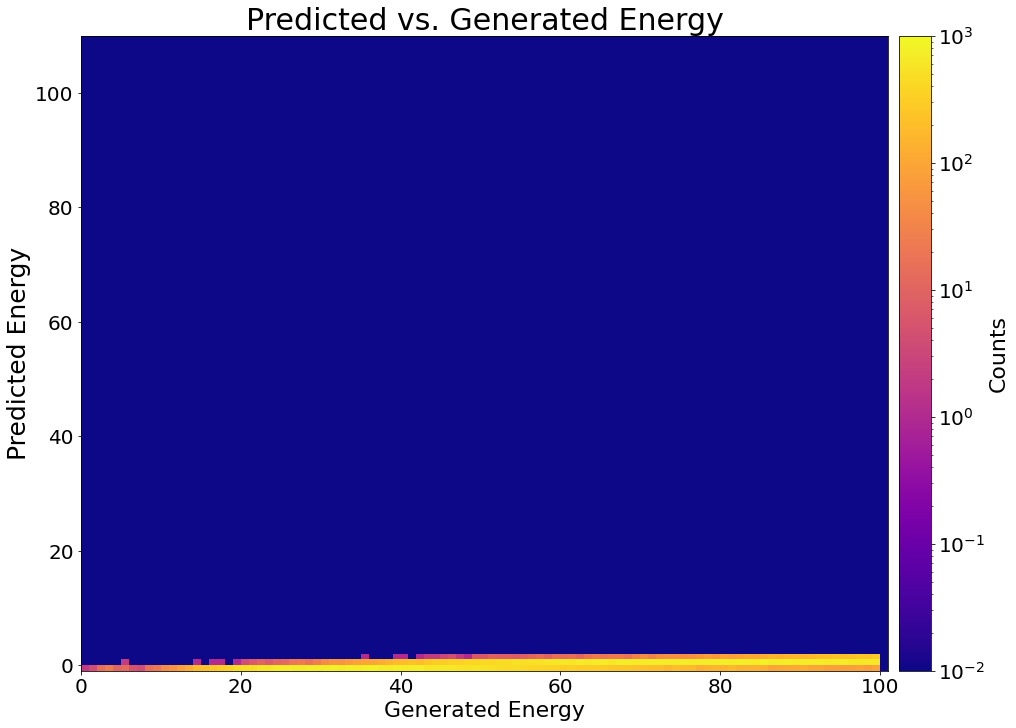

In [12]:
from copy import copy
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(nrows=1, figsize=(14, 10), constrained_layout=True)
cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))
edges=np.linspace(-10,110,121)
h, xedges, yedges = np.histogram2d(Y_test, mypreds[:,0], bins=[edges, edges])
pcm = axes.pcolormesh(xedges, yedges, h.T, cmap=cmap,
                         norm=LogNorm(vmin=1.0e-2,vmax=1.0e3), rasterized=True)
cb = fig.colorbar(pcm, ax=axes, pad=0)
cb.set_label("Counts",fontsize=22)
cb.ax.tick_params(labelsize=20)
axes.set_xlabel("Generated Energy",fontsize=22)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylim(-1,110)
plt.xlim(-0,101)
axes.set_ylabel("Predicted Energy",fontsize=25)
axes.set_title("Predicted vs. Generated Energy",fontsize=30)
plt.savefig("%s/Gen_vs_Pred.pdf"%(path))
print(np.size(yedges))

In [13]:
#Load NN Performance
NN_Res = np.asarray([7.8424015009380845, 0.20434782608695654,12.457786116322698, 0.1815217391304348,17.523452157598495, 0.1532608695652174,
22.589118198874292, 0.13967391304347826,27.5422138836773, 0.13260869565217392,32.607879924953096, 0.12445652173913044,
37.5609756097561, 0.12282608695652172,42.5140712945591, 0.11902173913043479,47.4671669793621, 0.11684782608695649,
52.5328330206379, 0.11684782608695649,57.485928705440905, 0.11467391304347824,62.551594746716695, 0.11413043478260868,
67.6172607879925, 0.11467391304347824,72.6829268292683, 0.11576086956521736,77.6360225140713, 0.1108695652173913,
82.5891181988743, 0.10815217391304346,87.5422138836773, 0.10543478260869565,92.6078799249531, 0.1,97.5609756097561, 0.09293478260869564])

NN_Scale = np.asarray([6.235294117647058, 1.5016666666666665,7.764705882352942, 1.2349999999999999,12.352941176470587, 1.1099999999999999,
17.41176470588235, 1.075,22.470588235294116, 1.0583333333333333,27.411764705882348, 1.0483333333333333,32.470588235294116, 1.0433333333333334,
37.529411764705884, 1.0366666666666666,42.588235294117645, 1.03,47.52941176470588, 1.025,52.470588235294116, 1.0183333333333333,
57.529411764705884, 1.0133333333333334,62.58823529411764, 1.0066666666666668,67.41176470588236, 1,72.47058823529412, 0.9966666666666667,
77.52941176470588, 0.9916666666666667,82.35294117647058, 0.985,87.41176470588235, 0.975,92.4705882352941, 0.9600000000000001,
97.52941176470587, 0.9400000000000001])

In [14]:
star_energies = [12,16,20,25,30,50,60,70]
star_res = [0.18, 0.16, 0.15, 0.14, 0.13, 0.098, 0.092, 0.090]

ECCE_res = [0.15,0.127,0.117,0.121,0.106,0.102,0.092,0.098]
ECCE_energies = [10,20,30,40,50,60,80,100]

In [15]:
#Binning
N = 51
E_Max = 100
E_Bins = np.linspace(0,E_Max,N)

#Goal: slices defined by bin of truthE, filled with prediction distributions
indecies = np.digitize(Y_test,E_Bins)-1
max_count = ((np.bincount(indecies).max()))
slices = np.empty((N,max_count))
slices.fill(np.nan)

counter = np.zeros(N,int)
avg_truth = np.zeros(N,float)

pred_over_truth = np.zeros(N,float)

for i in range(len(mypreds)):
    
    #if (Y_test[i] > E_Max): continue
    bin = indecies[i]
    slices[bin][counter[bin]] = mypreds[i] #slices[bin, element inside bin]
    counter[bin]+=1
    avg_truth[bin]+=Y_test[i]
    pred_over_truth[bin] += mypreds[i]/Y_test[i]
    

#Resoluton: stdev(pred)/avg_truth    
avg_truth = avg_truth/counter
stdev_pred = np.nanstd(slices,axis=1)
resolution = stdev_pred/avg_truth

pred_over_truth = pred_over_truth/counter

/tmp/ipykernel_17002/1493388656.py:28: RuntimeWarning: invalid value encountered in true_divide
  avg_truth = avg_truth/counter
/global/home/users/ftoralesacosta/anaconda3/envs/tin/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_17002/1493388656.py:32: RuntimeWarning: invalid value encountered in true_divide
  pred_over_truth = pred_over_truth/counter


/tmp/ipykernel_17002/698098943.py:13: RuntimeWarning: invalid value encountered in sqrt
  errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred


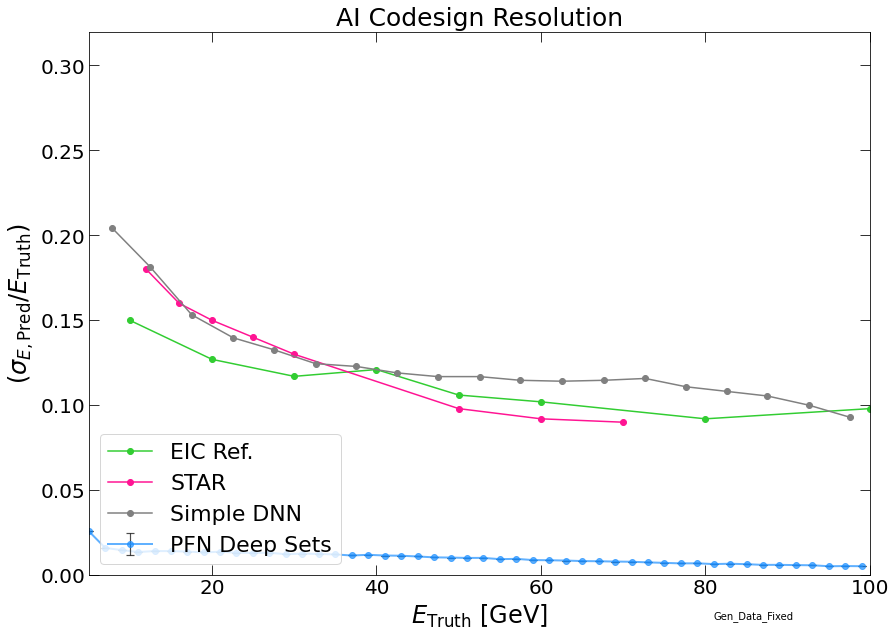

In [16]:
fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Resolution",fontsize=25)
plt.ylabel("$(\sigma_{E,\mathrm{Pred}}/E_\mathrm{Truth})$",fontsize=24)
plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
#plt.ylim(-0.02,0.4)
plt.ylim(0,2)
plt.ylim(0,.32)
plt.xlim(-0.01,100.01)
plt.xlim(5.0,100)
errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
ax = plt.subplot(1,1,1)
first_bin = 0
last_bin = N

plt.text(0.8,-0.08,label,transform=ax.transAxes,fontsize=10)
errors = np.zeros(len(errors))
plt.errorbar(avg_truth[first_bin:last_bin],resolution[first_bin:last_bin],yerr=errors[first_bin:last_bin],
             linestyle="-",linewidth=2.0,capsize=4,capthick=1.2,elinewidth=1.2,ecolor='black',marker="o",color='dodgerblue',alpha=0.7,label="PFN Deep Sets")
#_ = plt.text(0.7,0.93,"Stat. Error: $\dfrac{\sigma}{\sqrt{2N-2} } $",transform=ax.transAxes,fontsize=20)

plt.plot(ECCE_energies,ECCE_res,"-o",label = "EIC Ref.",color="limegreen")
plt.plot(star_energies,star_res,"-o",label = "STAR",color="deeppink")
plt.plot(NN_Res[0::2],NN_Res[1::2],"-o",label="Simple DNN",color="grey")
plt.legend(fontsize=22,loc="lower left")
plt.savefig("%s/resolution_plot.pdf"%(path))

/tmp/ipykernel_17002/2838208313.py:16: RuntimeWarning: Mean of empty slice
  ax.axvline(x=np.nanmean(slices,axis=-1)[i],color='cyan',alpha=0.3,linestyle="--",label="Avg. $E_\mathrm{Pred} = %1.2f$"%(np.nanmean(slices,axis=-1)[i]))


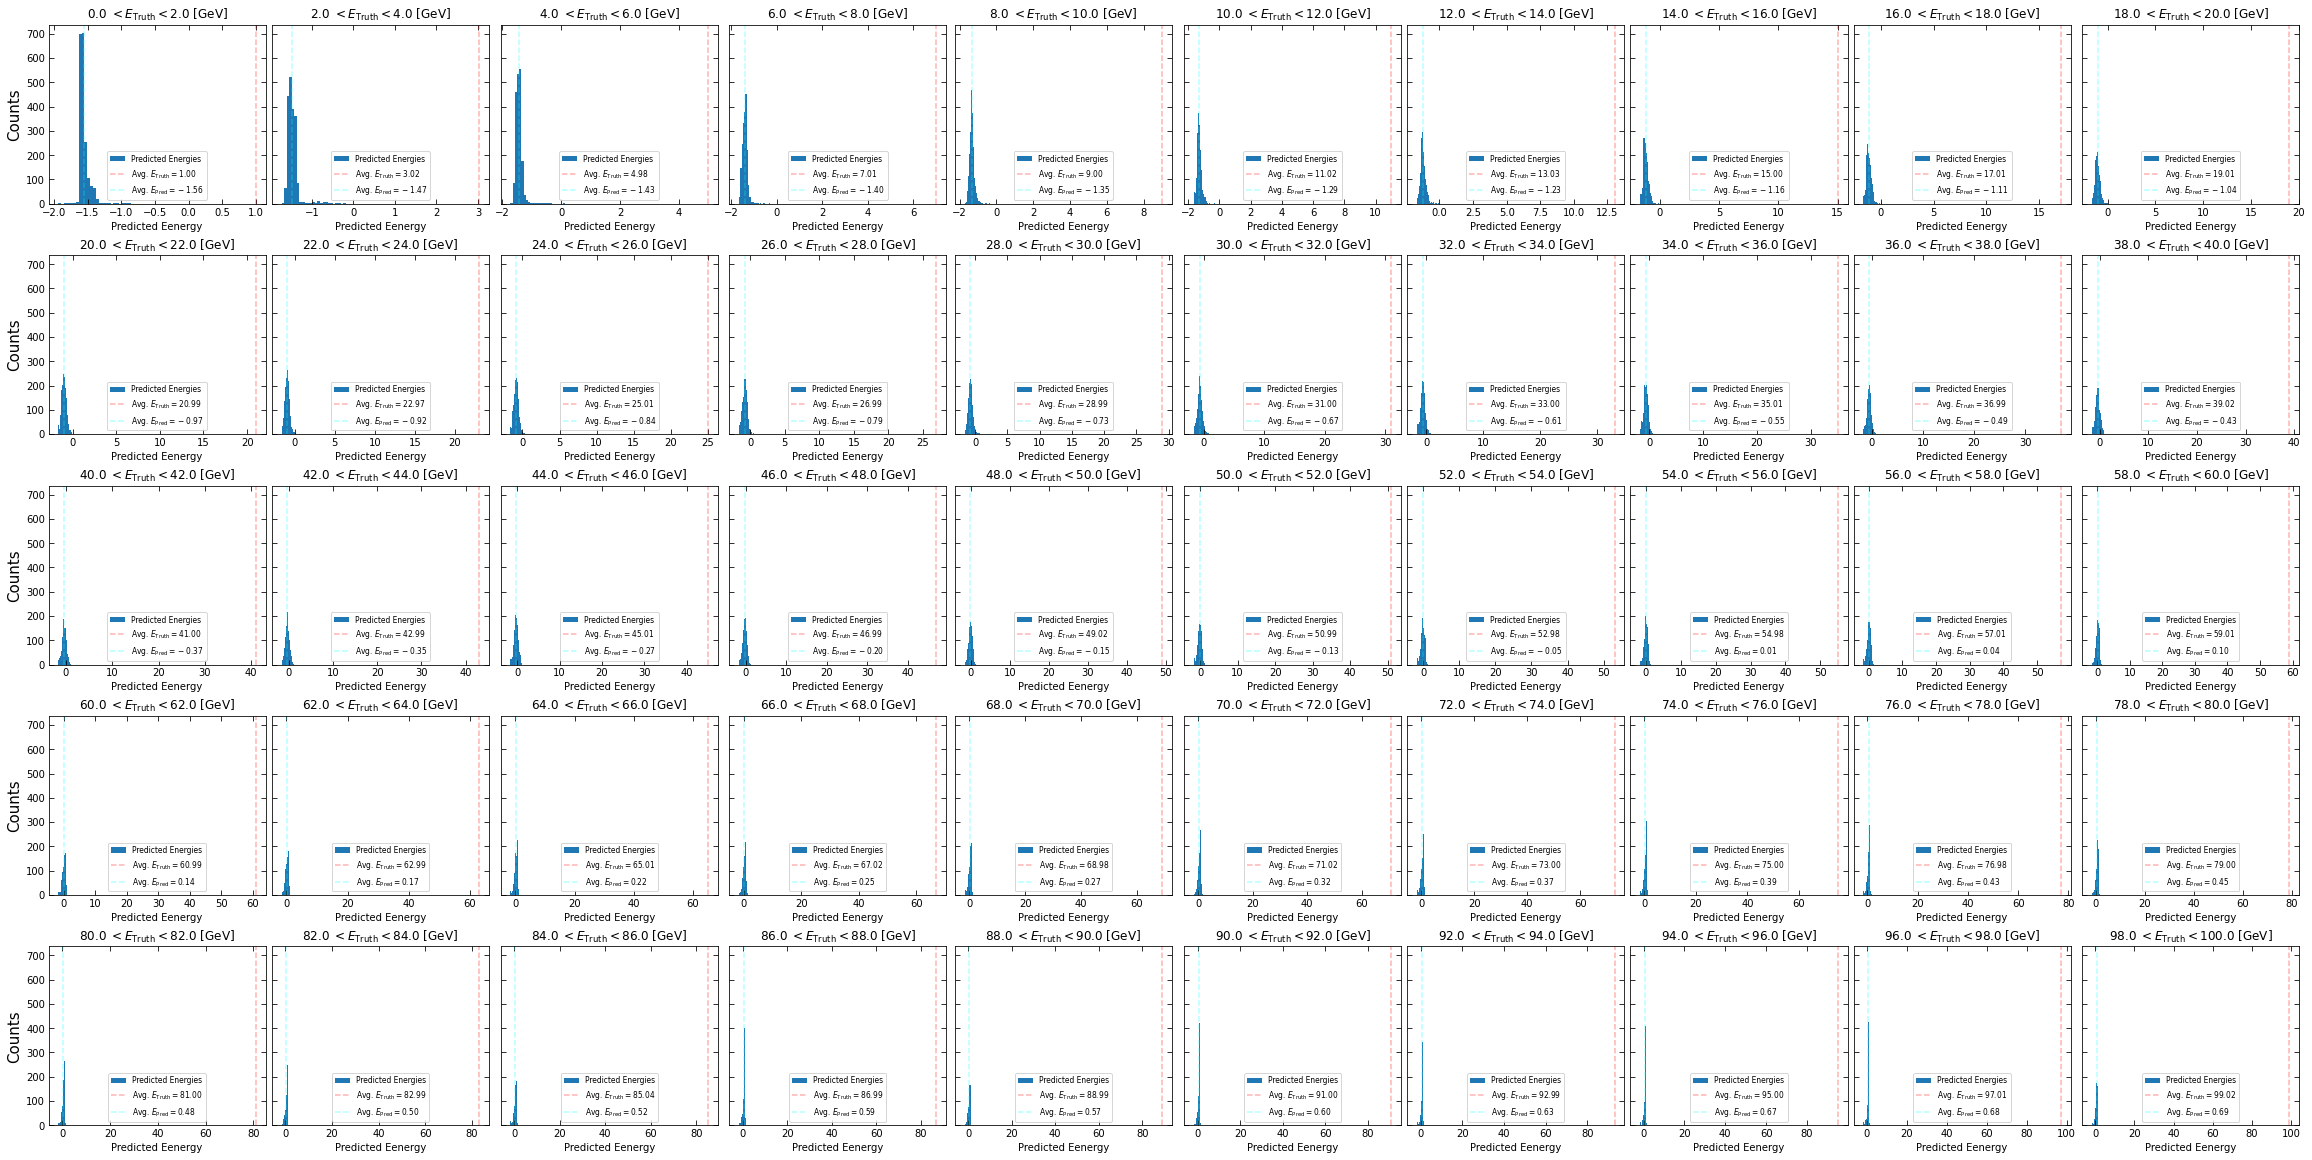

In [17]:
fig,axs = plt.subplots(int(N/10),10, figsize=(32, 16),sharex=False,sharey=True,constrained_layout=True)
for i in range(N):
    row = int(i/10)
    col = i%10
    if(row==int(N/10)): continue
    ax = axs[row,col]
    
    if (col==0):
        ax.set_ylabel("Counts",fontsize=15)
        
    temp_bin = np.linspace(avg_truth[i]-2.0,avg_truth[i]+2.0,16)
    ax.set_title("%1.1f $ < E_\mathrm{Truth} < $%1.1f [GeV]"%(E_Bins[i],E_Bins[i+1]))
    ax.set_xlabel("Predicted Eenergy")
    ax.hist(slices[i],label="Predicted Energies",bins=25)
    ax.axvline(x=avg_truth[i],color='red',alpha=0.3,linestyle="--",label="Avg. $E_\mathrm{Truth} = %1.2f$"%(avg_truth[i]))
    ax.axvline(x=np.nanmean(slices,axis=-1)[i],color='cyan',alpha=0.3,linestyle="--",label="Avg. $E_\mathrm{Pred} = %1.2f$"%(np.nanmean(slices,axis=-1)[i]))

    ax.legend(fontsize=7.5)
    ax.tick_params(direction='in',right=True,top=True,length=5)
plt.savefig("%s/resolutions_slices.pdf"%(path))

/tmp/ipykernel_17002/1963411306.py:11: RuntimeWarning: invalid value encountered in sqrt
  errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred


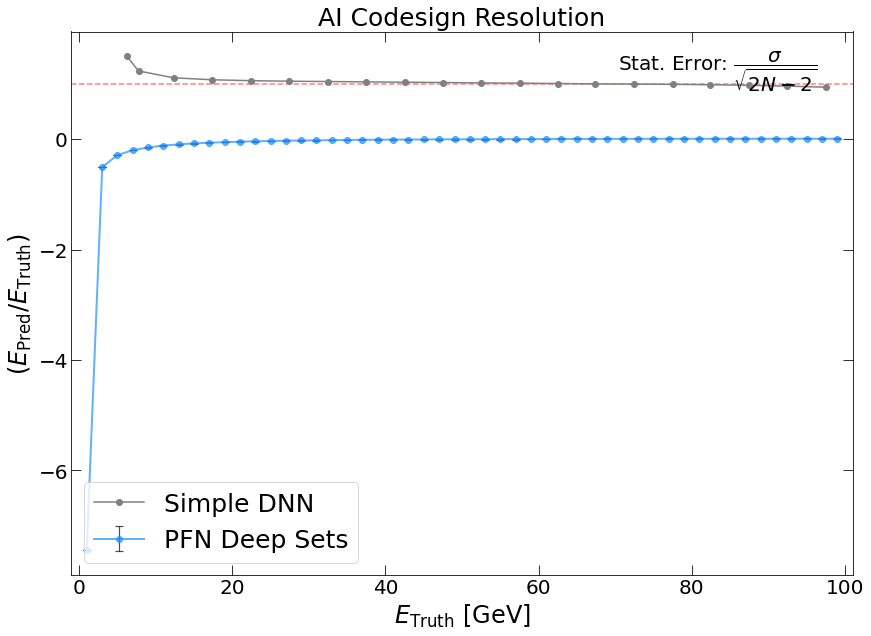

In [18]:
fig=plt.figure(figsize=(14,10))
plt.title("AI Codesign Resolution",fontsize=25)
plt.ylabel("$(E_\mathrm{Pred}/E_\mathrm{Truth})$",fontsize=24)
plt.xlabel("$E_\mathrm{Truth}$ [GeV]",fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.axhline(y=1.0, color='r', linestyle='--',alpha=0.5)#plt.ylim(-0.02,0.4)
#plt.ylim(0.5,1.5)
plt.xlim(-1,101)
errors = 1.0/(np.sqrt(2*counter-2))*stdev_pred
ax = plt.subplot(1,1,1)
first_bin = 0
last_bin = N
plt.errorbar(avg_truth[first_bin:last_bin],pred_over_truth[first_bin:last_bin],yerr=errors[first_bin:last_bin],
             linestyle="-",linewidth=2.0,capsize=4,capthick=1.2,elinewidth=1.2,ecolor='black',marker="o",color='dodgerblue',alpha=0.7,label="PFN Deep Sets")
_ = plt.text(0.7,0.93,"Stat. Error: $\dfrac{\sigma}{\sqrt{2N-2} } $",transform=ax.transAxes,fontsize=20)
plt.plot(NN_Scale[0::2],NN_Scale[1::2],"-o",label="Simple DNN",color="grey")
ax.legend(loc='lower left',fontsize=25)
plt.savefig("%s/scale_plot.pdf"%(path))

912 / 99000 Events [0.921%]


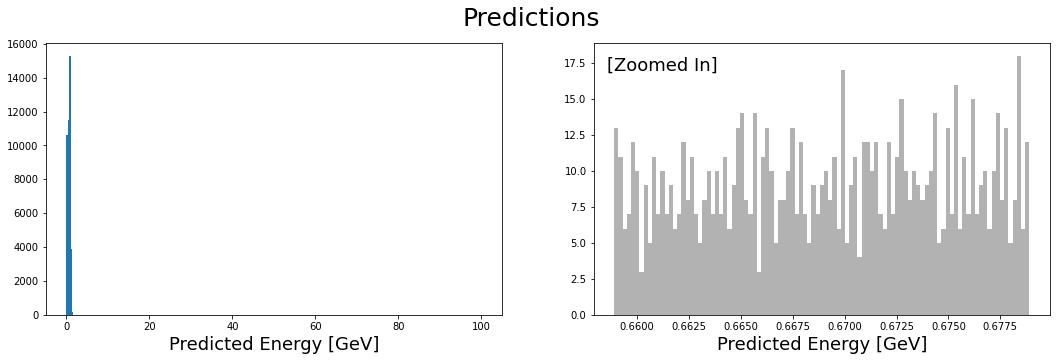

In [19]:
#Find the peak and zoom in
fig = plt.figure(figsize=(18,5))
plt.suptitle("Predictions",fontsize=25)
ax = plt.subplot(1, 2, 1)
plt.xlabel("Predicted Energy [GeV]",fontsize=18)
bins = np.linspace(0,100,300)
freq = plt.hist(mypreds, bins=bins)

ax = plt.subplot(1, 2, 2)
plt.xlabel("Predicted Energy [GeV]",fontsize=18)
plt.text(0.03,0.9,"[Zoomed In]",transform=ax.transAxes,fontsize=18)
maxbin = np.argmax(freq[0])
zoom = np.linspace(bins[maxbin]-0.01,bins[maxbin]+0.01,100)
mask = np.where(np.logical_and(mypreds>=bins[maxbin]-0.01, mypreds<=bins[maxbin]+0.01))[0]
_ = plt.hist(mypreds[mask],alpha=.3,color="black",bins=zoom)
print("%i / %i Events"%(len(mask),len(mypreds)),"[{:.3%}]".format( (len(mask)/len(mypreds)) ) )

In [20]:
#plt.hist(np.count_nonzero(np.ravel(X_test[:,1,:])))
weird_data = X_test[mask]
bins = np.linspace(0,1000,100)
fig = plt.figure(figsize=(18,5))
ax = plt.subplot(1,2,1)
plt.hist(np.ravel(np.count_nonzero(X_test,axis=2)),bins=bins)
plt.title("Entire Image Dataset",fontsize=20)
ax = plt.subplot(1,2,2)
plt.title("Weird Cells",fontsize=20)
plt.hist(np.ravel(np.count_nonzero(weird_data,axis=2)),bins=bins)
plt.suptitle("Number of Cell Hits",fontsize=25)

NameError: name 'X_test' is not defined

In [ ]:
cm = plt.cm.get_cmap('plasma')
cell_vars = ["Energy","Cell X","Cell Y","Cell Depth","Layer 1 Position", "Layer 2 Position"]
bins = [np.linspace(0.01,500,200),np.linspace(-500,500,100),
        np.linspace(-500,1300,100),np.linspace(-1.5,2.5,100),
        np.linspace(-275,350,100),np.linspace(-275,350,100)]
data=[]
weird_data=X_test[mask]
fig = plt.figure(figsize=(18,9))
#plt.subplots_adjust(left=None, bottom=1, right=None, top=1.5, wspace=None, hspace=None)
for i in range(images.shape[1]):
    ax = plt.subplot(2, 3, i+1)
    data.insert(i,np.ravel(weird_data[:,i,:]))
    data[i] = data[i][data[i]!=0]
    plt.hist(data[i],bins=bins[i],color=cm(i/images.shape[1]))
    plt.title("%s"%(cell_vars[i]),fontsize=20)
    plt.suptitle("'Weird' Normalized Cell Input Data",fontsize=25)
plt.savefig("%s/weird_Cell_Data.pdf"%(path))
    #plt.xlabel('%s [Normalized]'%(cell_vars[i]),fontsize=15)

In [ ]:
cm = plt.cm.get_cmap('plasma')
cell_vars = ["Energy","Cell X","Cell Y","Cell Depth","Layer 1 Position", "Layer 2 Position"]
bins = [np.linspace(0.01,500,200),np.linspace(-500,500,100),
        np.linspace(-500,1300,100),np.linspace(-1.5,2.5,100),
        np.linspace(-275,350,100),np.linspace(-275,350,100)]
weird_data=X_test[mask]
fig = plt.figure(figsize=(18,9))
#plt.subplots_adjust(left=None, bottom=1, right=None, top=1.5, wspace=None, hspace=None)
for i in range(images.shape[1]-1):
    ax = plt.subplot(2, 3, i+1)
    plt.scatter(np.ravel(weird_data[:,i,:]),np.ravel(weird_data[:,i+1,:]),s=2)
    plt.xlabel(cell_vars[i])
    plt.ylabel(cell_vars[i+1])
    #plt.title("%s"%(cell_vars[i]),fontsize=20)
    plt.suptitle("'Weird' Normalized Cell Scatter Plots",fontsize=25)
plt.savefig("%s/weird_Cell_Data.pdf"%(path))

In [ ]:
print([images.chunks])

In [ ]:
batch = images.chunks[0]*4
shape = [batch,images.chunks[1],images.chunks[2]] #TF is quite particular...
ds = tf.data.Dataset.from_generator(
    generator(h5_file)
    tf.float32,
    tf.TensorShape(shape)
)
